In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv("../data/complaints.csv")
df.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_18784\1937940366.py:8: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/complaints.csv")


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460


In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns


Index(['date_received', 'product', 'sub-product', 'issue', 'sub-issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided?',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response?', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [4]:
df = df[['consumer_complaint_narrative', 'product']]
df.head()


,consumer_complaint_narrative,product
0,NaN,Checking or savings account
1,NaN,Checking or savings account
2,NaN,Debt collection
3,NaN,"Credit reporting, credit repair services, or o..."
4,NaN,Checking or savings account


In [5]:
df.isnull().sum()


consumer_complaint_narrative    898791
product                              0
dtype: int64

In [6]:
df = df.dropna()
df.shape


(383564, 2)

In [7]:
df['product'].value_counts().head(10)


product
Credit reporting, credit repair services, or other personal consumer reports    92378
Debt collection                                                                 86710
Mortgage                                                                        52987
Credit reporting                                                                31588
Student loan                                                                    21810
Credit card or prepaid card                                                     21379
Credit card                                                                     18838
Bank account or service                                                         14885
Checking or savings account                                                     12881
Consumer Loan                                                                    9474
Name: count, dtype: int64

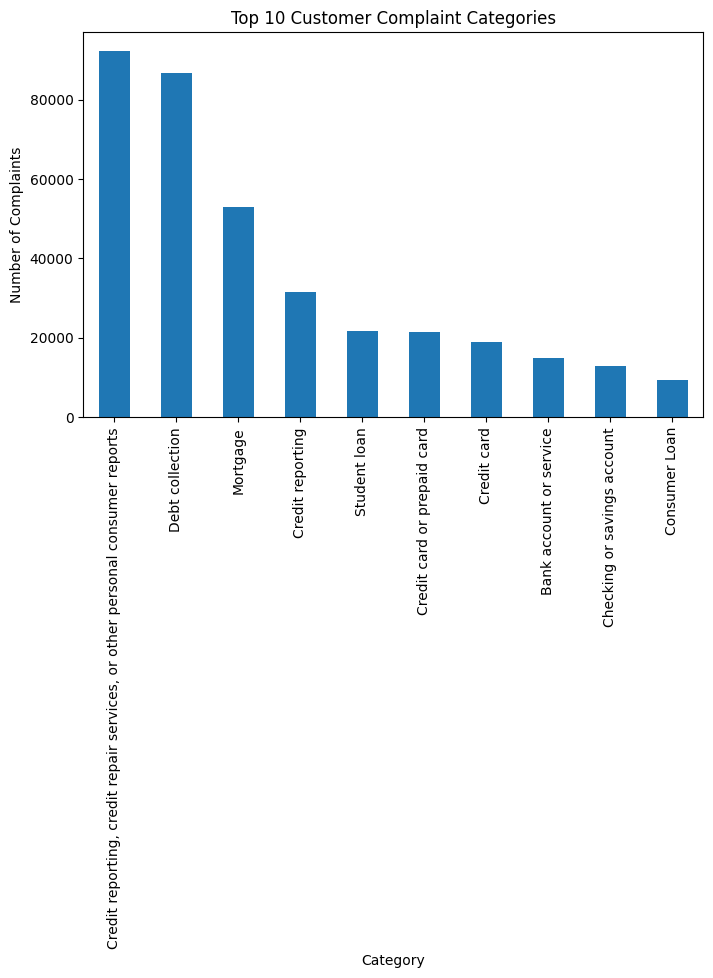

In [8]:
import os
os.makedirs("visuals", exist_ok=True)

plt.figure(figsize=(8,5))
df['product'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Customer Complaint Categories")
plt.xlabel("Category")
plt.ylabel("Number of Complaints")
plt.savefig("visuals/top_complaint_categories.png", bbox_inches="tight")
plt.show()


In [9]:
import os
os.makedirs("visuals", exist_ok=True)


In [10]:
X = df['consumer_complaint_narrative']
y = df['product']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
X_train = X_train.fillna("")
X_test = X_test.fillna("")


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)


In [14]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)


In [15]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)


,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [16]:
y_pred = model.predict(X_test_vec)


In [17]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()



In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.6889575430500697

In [19]:
feature_names = vectorizer.get_feature_names_out()


In [20]:
import numpy as np

top_words = {}

for i, category in enumerate(model.classes_):
    top_indices = np.argsort(model.feature_log_prob_[i])[-10:]
    top_words[category] = [feature_names[j] for j in top_indices]


In [21]:
for product, words in top_words.items():
    print(product)
    print(words)
    print("-" * 50)


Bank account or service
['fees', 'overdraft', 'xx', 'checking', 'check', 'money', '00', 'account', 'bank', 'xxxx']
--------------------------------------------------
Checking or savings account
['deposit', 'funds', 'checking', 'check', 'money', '00', 'bank', 'account', 'xx', 'xxxx']
--------------------------------------------------
Consumer Loan
['account', 'payments', '00', 'credit', 'xx', 'vehicle', 'payment', 'car', 'loan', 'xxxx']
--------------------------------------------------
Credit card
['late', 'balance', 'payment', 'bank', 'xx', '00', 'account', 'credit', 'card', 'xxxx']
--------------------------------------------------
Credit card or prepaid card
['balance', 'late', 'bank', 'payment', '00', 'account', 'credit', 'card', 'xx', 'xxxx']
--------------------------------------------------
Credit reporting
['accounts', 'reporting', 'xx', 'experian', 'information', 'account', 'equifax', 'report', 'credit', 'xxxx']
--------------------------------------------------
Credit reporti